### Datasets Analysis: 

In [1]:
import os,random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
dir_save_file = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset6actv\\'
# dir_save_file ='C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset\\originalWindFreq\\'
datasetList = ['Dsads','Ucihar','Uschad','Pamap2']
n_classes = 6

In [2]:
def normalize(X,Y):
    newX = []
    newY = []
    m = np.array([np.mean(X[:, :, i]) for i in range(X.shape[-1])])
    std = np.array([np.std(X[:, :, i]) for i in range(X.shape[-1])])
    for sample,label in zip(X[:,:,:],Y):
        sample = (sample - m)/std
        newX.append(sample)
        newY.append(label)
    newX, newY = np.array(newX), np.array(newY)
    return newX[:,:,:],newY

In [3]:
myActNames = {
	'walking': 0,
	'walking forward': 0,
	'ascending stairs': 1,
	'walking up': 1,
	'descending stairs': 2,
	'walking down': 2,
	'lying':3,
	'lying on back':3,
	'lying on right':3,
	'laying':3,
	'sleeping':3,
	'sitting': 4,
	'standing': 5,
}
idx2Name = {
	0:'walking',
	1:'ascending stairs',
	2:'descending stairs',
	3:'lying',
    4:'sitting',
    5:'standing',
}
def standarizeActName(y):
    y1 = list(map(lambda x: x.split('-')[-1], y))
    y2 = list(map(lambda x: myActNames[x], y1))
    return np.array(list(map(lambda x: idx2Name[x], y2)))
    

    
def readDataset(fileName,freq = 50):
    file = os.path.join(dir_save_file, f'{fileName}.npz')
    with np.load(file, allow_pickle=True) as tmp:
        X = tmp['X'].astype('float32')
        Y = tmp['y']
        #folds = tmp['folds']
    #Y = standarizeActName(y)
    return X,Y
    #return X[:,0,:,:],Y,folds

In [28]:
def addZeros(dat1,dif):
    """
    merging zeros into dat 1
    """
    difLeft = int(dif/2)
    difRight =difLeft  +  dif%2
    test = np.concatenate((np.zeros([dat1.shape[0],difLeft,dat1.shape[2]]),dat1),axis = 1)
    test = np.concatenate((test,np.zeros([dat1.shape[0],difRight,dat1.shape[2]])),axis = 1)
    return test
def downSample(x):
    newX = []
    for x_i in x:
        xdown = [x_i[i] for i in range(len(x_i)) if i%2==0]
        newX.append(xdown)
    return np.array(newX)
def saveTempDataset(x,y,datasetName,datasetNametarget):
    print(x.shape)
    dir_save_file = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset6actv\\'
    np.savez_compressed(os.path.join(dir_save_file, f"{datasetName}_to_{datasetNametarget}"),
                    X=x,
                    y=y)
def normalize(X,Y):
    newX = []
    newY = []
    m = np.array([np.mean(X[: :, i]) for i in range(X.shape[-1])])
    std = np.array([np.std(X[:,:, i]) for i in range(X.shape[-1])])
    for sample,label in zip(X,Y):
        sample = (sample - m)/std
        newX.append(sample)
        newY.append(label)
    newX, newY = np.array(newX), np.array(newY)
    return newX,newY
def unifyDatashapes(datasetName1,datasetName2):
    dat1,y1= readDataset(datasetName1)
    dat2,y2= readDataset(datasetName2)
    if datasetName2 == 'Uschad_6activities':
        dat2 = downSample(dat2)
    if datasetName1 == 'Uschad_6activities':
        dat1 = downSample(dat1)
    dat1,y1 = normalize(dat1,y1)
    dat2,y2 = normalize(dat2,y2)
    dif = dat2.shape[1] - dat1.shape[1]
    if dif>0:
        dat1 = addZeros(dat1,dif)
    else: 
        dif = dif*-1
        dat2 = addZeros(dat2,dif)
    saveTempDataset(dat1,y1,datasetName1,datasetName2)
    saveTempDataset(dat2,y2,datasetName2,datasetName1)

    

In [29]:
unifyDatashapes("Uschad_6activities","Dsads_6activities")
unifyDatashapes("Uschad_6activities","Ucihar_6activities")
unifyDatashapes("Dsads_6activities","Uschad_6activities")
unifyDatashapes("Dsads_6activities","Ucihar_6activities")
unifyDatashapes("Ucihar_6activities","Uschad_6activities")

(3999, 250, 6)
(3360, 250, 6)
(3999, 250, 6)
(10297, 250, 6)
(3360, 250, 6)
(3999, 250, 6)
(3360, 128, 6)
(10297, 128, 6)
(10297, 250, 6)
(3999, 250, 6)


In [22]:
usc,y_usc = readDataset("Uschad_6activities")
dsa,y_dsa = readDataset("Dsads_6activities")
uci,y_uci = readDataset("Ucihar_6activities")


In [11]:
dsa.shape

(3360, 125, 6)

In [23]:
usc.shape

(3999, 500, 6)

In [17]:
uci.shape

(10297, 128, 6)

In [24]:
pd.value_counts(y_usc)


Uschad-walking              1752
Uschad-lying                 750
Uschad-ascending stairs      396
Uschad-sitting               394
Uschad-descending stairs     365
Uschad-standing              342
dtype: int64

In [7]:
pd.value_counts(y_dsa)

Dsads-lying          960
Dsads-descending     480
Dsads-ascending s    480
Dsads-walking        480
dtype: int64

'Uschad-lying'

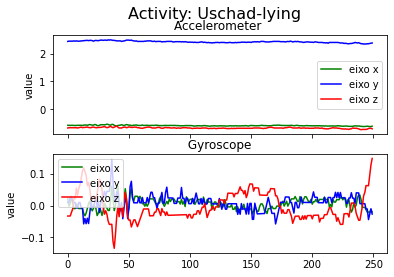

In [21]:
sample = 1
uscDown = downSample(usc)
x = uscDown[sample]
label =y_usc[sample]
sensors = ['Accelerometer', ' Gyroscope']
n_sensors = 2
axis = [' x', ' y', ' z']
f, axarr = plt.subplots(n_sensors, 1, sharex=True, sharey=False)
for i in range(n_sensors):
    axarr[i].plot(x[:, 3*i+0].tolist(), color='green', label='eixo x')
    axarr[i].plot(x[:, 3*i+1].tolist(), color='blue', label='eixo y')
    axarr[i].plot(x[:, 3*i+2].tolist(), color='red', label='eixo z')
    axarr[i].set_title(f'{sensors[i]} ')
    axarr[i].set_ylabel(f'value')
    axarr[i].legend()
f.suptitle(f'Activity: {label}', fontsize=16)
plt.show()

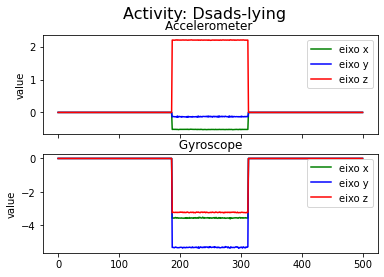

In [12]:
sample = 1
x = dsa[sample]
label =y_dsa[sample]
sensors = ['Accelerometer', ' Gyroscope']
n_sensors = 2
axis = [' x', ' y', ' z']
f, axarr = plt.subplots(n_sensors, 1, sharex=True, sharey=False)
for i in range(n_sensors):
    axarr[i].plot(x[:, 3*i+0].tolist(), color='green', label='eixo x')
    axarr[i].plot(x[:, 3*i+1].tolist(), color='blue', label='eixo y')
    axarr[i].plot(x[:, 3*i+2].tolist(), color='red', label='eixo z')
    axarr[i].set_title(f'{sensors[i]} ')
    axarr[i].set_ylabel(f'value')
    axarr[i].legend()
f.suptitle(f'Activity: {label}', fontsize=16)
plt.show()

In [15]:
dsaOri.shape

(2400, 125, 6)

In [13]:
# x,y  = readDataset('Pamap2')
# x,y = normalize(x,y)
# pd.value_counts(y)

1    891
0    873
2    826
3    468
dtype: int64

### Values Distributions:
Accelerometer Data

In [19]:
# You can select one activity if necessary: 
x_axis = []
y_axis = []
z_axis = []
for dat in datasetList:
    x,y = readDataset(dat)
    x,y = normalize(x,y)
    x = x[:,:,0:3]  
#     idx = np.where(y==0)[0]
#     x = x[idx]
    x_axis.append(x[:,:,0].flatten())
    y_axis.append(x[:,:,1].flatten())
    z_axis.append(x[:,:,2].flatten())

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

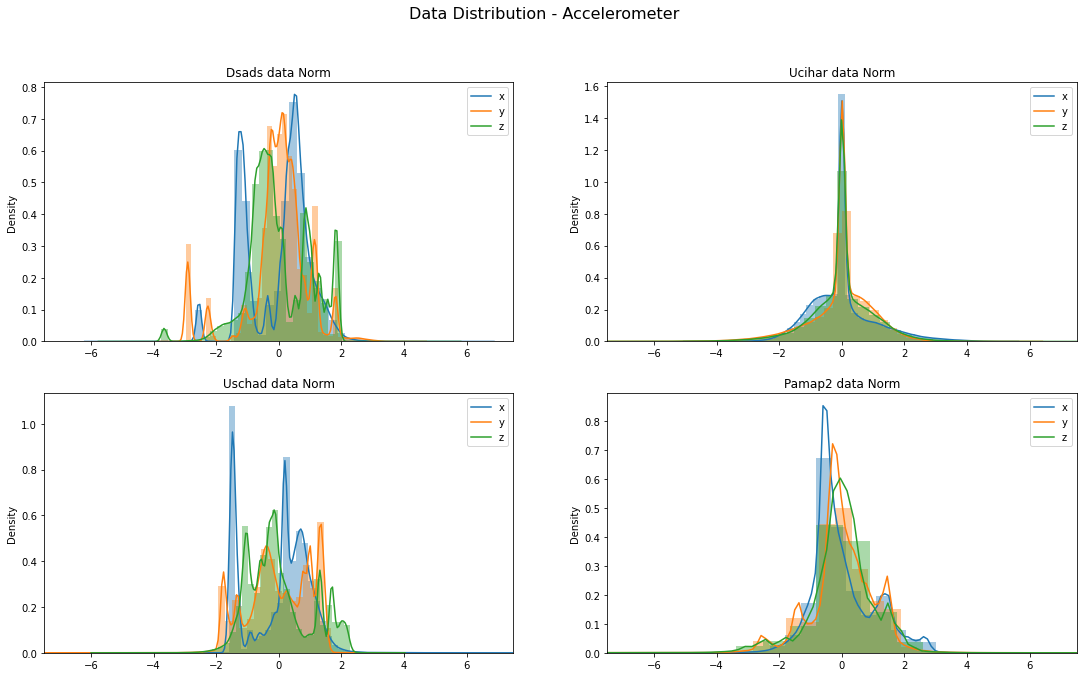

In [22]:

lim = 7.5
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Data Distribution - Accelerometer', fontsize=16)
for i,dat in enumerate(datasetList):
    sns.distplot(x_axis[i],ax = axs[int(i/2),i%2])
    sns.distplot(y_axis[i],ax =axs[int(i/2),i%2])
    sns.distplot(z_axis[i],ax = axs[int(i/2),i%2])
    axs[int(i/2),i%2].set_title(f'{dat} data Norm')
    axs[int(i/2),i%2].legend(['x','y','z'])
    axs[int(i/2),i%2].set_xlim([-lim, lim])
plt.savefig('../figures/data_dist.png')